In [1]:
import imf

In [2]:
imf.salpeter.mmin, imf.salpeter.mmax

(0.3, 120)

In [3]:
imf.kroupa.mmin, imf.kroupa.mmax

(0.03, 120)

In [4]:
imf.chabrier.mmin, imf.chabrier.mmax

(0, inf)

In [5]:
mmin=0.03
mmax=120

# 0. Plot the IMFs

In [6]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

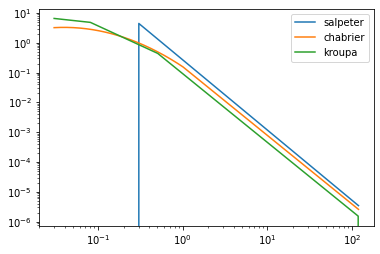

In [7]:
masses = np.geomspace(0.03, 120, 1000)
for distribution in ('salpeter', 'chabrier', 'kroupa'):
    distr = getattr(imf, distribution)
    pl.loglog(masses, distr(masses), label=distribution)
pl.legend(loc='best')

# 1. Mean Mass

In [8]:
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    mass_integral = distr.m_integrate(mmin, mmax)[0]
    n_integral = distr.integrate(mmin, mmax)[0]
    print(f'{distribution} mean mass: {mass_integral/n_integral:0.2f}')

Salpeter mean mass: 0.11
ChabrierPowerLaw mean mass: 0.67
Kroupa mean mass: 0.43


# Mean mass of high-mass stars

In [9]:
mmax = 120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    mean_highmass = distr.m_integrate(8, mmax)[0] / distr.integrate(8, mmax)[0]

    print(f'{distribution} Mean M(M>8) = {mean_highmass}')

Salpeter Mean M(M>8) = 19.398588286811815
ChabrierPowerLaw Mean M(M>8) = 19.869986688415548
Kroupa Mean M(M>8) = 19.869986688415917


# 2. Ratio of _number_ of high-mass (M>8 Msun) to low-mass stars

In [10]:
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    ratio_highmass = distr.integrate(8, mmax)[0]
    ratio_highmasslowmass = distr.integrate(8, mmax)[0] / distr.integrate(mmin, 8)[0]
    print(f'{distribution} N(M>8) / N(tot) = {ratio_highmass:0.4f}, N(M>8) / N(low) = {ratio_highmasslowmass:0.4f}')

Salpeter N(M>8) / N(tot) = 0.0001, N(M>8) / N(low) = 0.0005
ChabrierPowerLaw N(M>8) / N(tot) = 0.0079, N(M>8) / N(low) = 0.0085
Kroupa N(M>8) / N(tot) = 0.0040, N(M>8) / N(low) = 0.0046


# 3. Ratio of _mass_ of high-mass (M>8 Msun) to low-mass stars

In [11]:
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    ratio_highmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, mmax)[0]
    ratio_highmasslowmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, 8)[0]
    print(f'{distribution} M(M>8) / M(tot) = {ratio_highmass:0.4f}, M(M>8) / M(low) = {ratio_highmasslowmass:0.4f}')

Salpeter M(M>8) / M(tot) = 0.0917, M(M>8) / M(low) = 0.1010
ChabrierPowerLaw M(M>8) / M(tot) = 0.2491, M(M>8) / M(low) = 0.3318
Kroupa M(M>8) / M(tot) = 0.2094, M(M>8) / M(low) = 0.2648


# Do these numbers change if you change mmax?

In [12]:
for mmax in (100, 1000):
    print(f'\nM_max = {mmax}')
    for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
        distr = getattr(imf, distribution)(mmin=0.01, mmax=mmax)
        mass_integral = distr.m_integrate(mmin, mmax)[0]
        n_integral = distr.integrate(mmin, mmax)[0]
        print(f'{distribution} mean mass: {mass_integral/n_integral:0.2f}')

        ratio_highmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, mmax)[0]
        ratio_highmasslowmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, 8)[0]
        print(f'{distribution} M(M>8) / M(tot) = {ratio_highmass:0.4f}, M(M>8) / M(low) = {ratio_highmasslowmass:0.4f}')

        ratio_highmass = distr.integrate(8, mmax)[0]
        ratio_highmasslowmass = distr.integrate(8, mmax)[0] / distr.integrate(mmin, 8)[0]
        print(f'{distribution} N(M>8) / N(tot) = {ratio_highmass:0.4f}, N(M>8) / N(low) = {ratio_highmasslowmass:0.4f}')


M_max = 100
Salpeter mean mass: 0.11
Salpeter M(M>8) / M(tot) = 0.0882, M(M>8) / M(low) = 0.0968
Salpeter N(M>8) / N(tot) = 0.0001, N(M>8) / N(low) = 0.0005
ChabrierPowerLaw mean mass: 0.66
ChabrierPowerLaw M(M>8) / M(tot) = 0.2406, M(M>8) / M(low) = 0.3169
ChabrierPowerLaw N(M>8) / N(tot) = 0.0079, N(M>8) / N(low) = 0.0084
Kroupa mean mass: 0.43
Kroupa M(M>8) / M(tot) = 0.2019, M(M>8) / M(low) = 0.2530
Kroupa N(M>8) / N(tot) = 0.0039, N(M>8) / N(low) = 0.0046

M_max = 1000
Salpeter mean mass: 0.11
Salpeter M(M>8) / M(tot) = 0.1185, M(M>8) / M(low) = 0.1345
Salpeter N(M>8) / N(tot) = 0.0001, N(M>8) / N(low) = 0.0005
ChabrierPowerLaw mean mass: 0.73
ChabrierPowerLaw M(M>8) / M(tot) = 0.3133, M(M>8) / M(low) = 0.4563
ChabrierPowerLaw N(M>8) / N(tot) = 0.0081, N(M>8) / N(low) = 0.0087
Kroupa mean mass: 0.47
Kroupa M(M>8) / M(tot) = 0.2670, M(M>8) / M(low) = 0.3643
Kroupa N(M>8) / N(tot) = 0.0041, N(M>8) / N(low) = 0.0047


# How many stars go SN in a cluster of 1000 stars?

In [13]:
mmax = 120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    frac_highmass = distr.integrate(8, mmax)[0]

    print(f'{distribution} N(M>8) = {frac_highmass*1000}')

Salpeter N(M>8) = 0.11734391643471305
ChabrierPowerLaw N(M>8) = 7.920909626095133
Kroupa N(M>8) = 3.9744195120995363


# How many stars go SN in a cluster of 1000 Msun?

In [14]:
mmax = 120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    frac_highmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, mmax)[0]
    mean_highmass = distr.m_integrate(8, mmax)[0] / distr.integrate(8, mmax)[0]

    print(f'{distribution} N(M>8) = {frac_highmass*1000 / mean_highmass}')

Salpeter N(M>8) = 4.728148902929478
ChabrierPowerLaw N(M>8) = 12.536927701217804
Kroupa N(M>8) = 10.537785049663771


# ODF

In [15]:
mmax = 120
for mstar in (10,100):
    print()
    for distribution in ('salpeter', 'chabrier', 'kroupa'):
        distr = getattr(imf, distribution)
        massrange = np.linspace(8, 100)
        frac_highmass = distr.integrate(mstar, mmax)[0]
        print(f"{distribution}: nstars to make {mstar} = {int(1/frac_highmass)}")


salpeter: nstars to make 10 = 117
chabrier: nstars to make 10 = 172
kroupa: nstars to make 10 = 295

salpeter: nstars to make 100 = 11666
chabrier: nstars to make 100 = 15631
kroupa: nstars to make 100 = 26818


Text(0, 0.5, '$N_{*,cl}$')

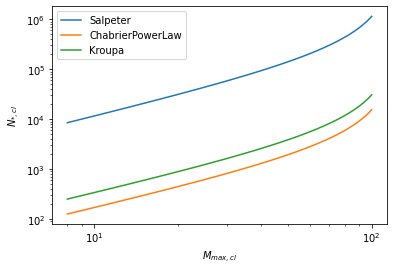

In [16]:
mmax = 120
pl.clf()
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    massrange = np.linspace(8, 100)
    frac_highmass = np.array([distr.integrate(mr, mmax)[0] for mr in massrange])
    pl.loglog(massrange, 1/frac_highmass, label=distribution)
pl.legend(loc='best')
pl.xlabel("$M_{max,cl}$")
pl.ylabel("$N_{*,cl}$")

# Mass of cluster vs m_max?

Salpeter: mass(100Msun) = 125911.73782606117, N(100msun) = 1151273
ChabrierPowerLaw: mass(100Msun) = 10362.125426008643, N(100msun) = 15482
Kroupa: mass(100Msun) = 13389.239070626289, N(100msun) = 30855


Text(0, 0.5, '$M_{*,cl}$')

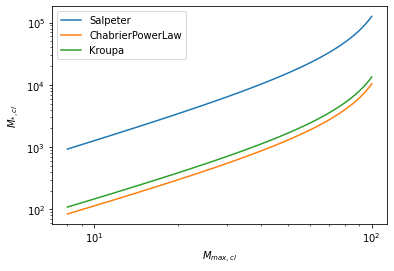

In [17]:
mmax = 120
pl.clf()
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    massrange = np.linspace(8, 100)
    frac_highmass = np.array([distr.integrate(mr, mmax)[0] for mr in massrange])
    
    mass_integral = distr.m_integrate(mmin, mmax)[0]
    n_integral = distr.integrate(mmin, mmax)[0]
    meanmass = mass_integral/n_integral
    
    pl.loglog(massrange, meanmass * 1/frac_highmass, label=distribution)
    print(f"{distribution}: mass(100Msun) = {meanmass / frac_highmass[-1]}, N(100msun) = {int(1/frac_highmass[-1])}")
pl.legend(loc='best')
pl.xlabel("$M_{max,cl}$")
pl.ylabel("$M_{*,cl}$")

# Minimum mass to "fully sample" IMF at 95% likelihood

How do we formulate the problem?

We want $P(M>100, N=1) > 95\%$

$$P(M>100) = \int_{100}^{M_{max}}\xi dM$$



So we want $P(M<100)^N = 0.05$, solve for $N$

$$N = \log(0.05) / \log (P(M<100))$$

In [18]:
mmax = 120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    
    n_integral_100 = 1-distr.integrate(100, mmax)[0]
    print(f"{distribution} P(>100) = {n_integral_100}, 1/(1-P(>100)={int(1/(1-n_integral_100))}")


    mass_integral = distr.m_integrate(mmin, mmax)[0]
    n_integral = distr.integrate(mmin, mmax)[0]
    meanmass = mass_integral/n_integral
    
    nstar = np.log(1-0.95) / np.log(n_integral_100)
    nstar50 = np.log(1-0.6321) / np.log(n_integral_100)

    
    minmass_cluster = meanmass*nstar
    
    print(f"{distribution}: Min mass for >1 100 Msun star at 95%: {minmass_cluster:0.2g} nstars={int(nstar)}")
    print(f"{distribution}: Min mass for >1 100 Msun star at 50%: {meanmass*nstar50:0.2g} nstars={int(nstar50)}")

Salpeter P(>100) = 0.999999131396621, 1/(1-P(>100)=1151273
Salpeter: Min mass for >1 100 Msun star at 95%: 3.8e+05 nstars=3448905
Salpeter: Min mass for >1 100 Msun star at 50%: 1.3e+05 nstars=1151208
ChabrierPowerLaw P(>100) = 0.999935410117752, 1/(1-P(>100)=15482
ChabrierPowerLaw: Min mass for >1 100 Msun star at 95%: 3.1e+04 nstars=46379
ChabrierPowerLaw: Min mass for >1 100 Msun star at 50%: 1e+04 nstars=15480
Kroupa P(>100) = 0.9999675911858097, 1/(1-P(>100)=30855
Kroupa: Min mass for >1 100 Msun star at 95%: 4e+04 nstars=92434
Kroupa: Min mass for >1 100 Msun star at 50%: 1.3e+04 nstars=30853


# What's the difference?

The PDF gives a ~1/3 chance of not having a 100 Msun star, while the ODF guarantees there will be exactly one.

# Luminosity

In [19]:
import scipy.integrate

In [20]:
mmin = 0.3
mmax = 120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    def lum(x):
        return x**3 * distr(x)
    lum_int = scipy.integrate.quad(lum, mmin, mmax)[0]
    mass_int = distr.m_integrate(mmin,mmax)[0]
    
    print(f"{distribution}: L/M = {lum_int/mass_int:0.1f}")

Salpeter: L/M = 427.7
ChabrierPowerLaw: L/M = 571.2
Kroupa: L/M = 524.6


# Multiplicity

In [21]:
mmin = 0.3
mmax = 120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    def lum(x):
        return 2*(x/2)**3 * distr(x)
    lum_int = scipy.integrate.quad(lum, mmin, mmax)[0]
    mass_int = distr.m_integrate(mmin,mmax)[0]
    
    print(f"{distribution}: L/M = {lum_int/mass_int:0.1f}")

Salpeter: L/M = 106.9
ChabrierPowerLaw: L/M = 142.8
Kroupa: L/M = 131.1


# ODF effects on L

In [22]:
mmax = 120
mtaurus = 100
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=0.01, mmax=120)
    
    mass_integral = distr.m_integrate(mmin, mmax)[0]
    n_integral = distr.integrate(mmin, mmax)[0]
    meanmass = mass_integral/n_integral
    
    massrange = np.linspace(1,mtaurus)
    frac_highmass = np.array([distr.integrate(mr, mmax)[0] for mr in massrange])
    mcluster = meanmass * (1/frac_highmass)
    maxmass = np.interp(mtaurus, mcluster, massrange)
    
    def lum(x):
        return x**3 * distr(x)
    lum_int = scipy.integrate.quad(lum, mmin, maxmass)[0]
    mass_int = distr.m_integrate(mmin, maxmass)[0]
    
    print(f"{distribution}: Mmax = {maxmass:0.1f} L/M = {lum_int/mass_int:0.1f}")

Salpeter: Mmax = 1.0 L/M = 0.3
ChabrierPowerLaw: Mmax = 5.3 L/M = 4.3
Kroupa: Mmax = 3.5 L/M = 2.1


# Some scribbled noted about likelihoods & die rolls

Probability of one successfull roll out of one attempt:

In [23]:
1/6

0.16666666666666666

Probability of one successful roll out of two attempts

In [24]:
1/6 * 5/6  + 1/6*5/6

0.27777777777777773

In [25]:
(1-(1/6)**2 - (5/6)**2)

0.2777777777777777

Probability of one successful roll out of three attempts

In [26]:
1/6 * (5/6)**2 * 3

0.34722222222222227

In [27]:
1- ((1/6)**3 + (1/6)**2*(5/6)*3 + (5/6)**3)

0.3472222222222221

Sum over all probability = 1

In [28]:
((1/6)**3 + (1/6)**2*(5/6)*3 + (5/6)**3) + (1/6)*(5/6)**2*3

1.0000000000000002

Text(0.5, 0, 'Number of rolls')

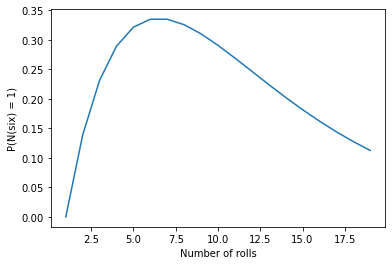

In [29]:
nrolls = np.arange(1,20)
pl.plot(nrolls, (1/6) * (5/6)**(nrolls-1) * (nrolls-1))
pl.ylabel("P(N(six) = 1)")
pl.xlabel("Number of rolls")